In [1]:
!pip install -U imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from IPython.display import display

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv (r'C:\Users\DELL\Desktop\Flip_Robo\task_23-10-22\Micro-Credit-Project--1---1-\Micro Credit Project\Data_file.csv')

In [4]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [5]:
data=data.drop(data.columns[0], axis=1)
data=data.drop(data.columns[34], axis=1)
data["pdate"] = pd.to_datetime(data["pdate"])

In [6]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-10-08
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

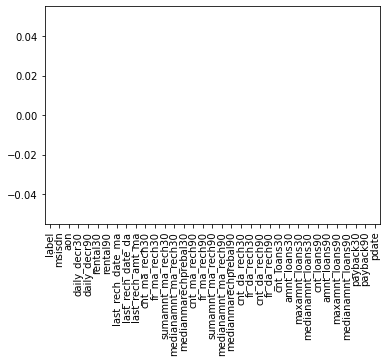

In [8]:
#Check is there any null value or not

data.isna().sum().plot(kind="bar")
data.isnull().sum()

In [9]:
# check unique mobile number 
len(pd.unique(data["msisdn"]))

186243

In [10]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
# Get the column name an d store it to the another variable

col_names=data.columns
col_names

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x13e3a32ffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x13e3a31e7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13e3a32f940>],
 'medians': [<matplotlib.lines.Line2D at 0x13e3a31e400>],
 'fliers': [<matplotlib.lines.Line2D at 0x13e3a332be0>],
 'means': []}

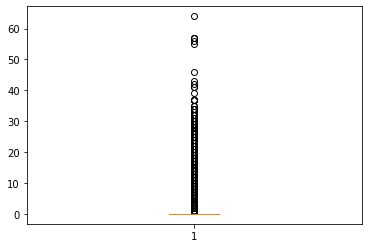

In [12]:
fig,ax=plt.subplots()
ax.boxplot(data["fr_da_rech90"])

In [13]:
# check the minimum value of column
data["fr_da_rech90"].min()
#data["aon"].min()

0

In [14]:
data = data.drop(data.index[data['aon'] < 0])

In [15]:
data = data.drop(data.index[data['daily_decr30'] < 0])

In [16]:
data = data.drop(data.index[data['rental30'] < 0])

In [17]:
data = data.drop(data.index[data['rental90'] < 0])

In [18]:
data = data.drop(data.index[data['last_rech_date_ma'] < 0])

In [19]:
data = data.drop(data.index[data['last_rech_date_da'] < 0])

In [20]:
data = data.drop(data.index[data['medianmarechprebal90'] < 0])

In [21]:
data = data.drop(data.index[data['medianmarechprebal30'] < 0])

In [22]:
data.drop_duplicates()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-10-08
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-12-06
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [23]:
# Data Cleaning

print('Total Non- defaulter customer',sum(data['label']==1))
print('Total defaulter customer',sum(data['label']==0))
len(data.index)

Total Non- defaulter customer 174008
Total defaulter customer 23325


197333

In [24]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000
mean,0.881799,8162.963611,5629.008544,6368.178216,2825.292433,3659.612118,3832.937763,3767.099897,2015.997639,4.080681,3781.177255,7707.380575,1768.862773,3847.545737,6.514506,7.659484,12541.633361,1814.639120,92.568154,265.270512,3740.172382,0.042856,0.046921,2.815956,18.362038,274.452782,0.054041,18.521334,24.337501,6.733623,0.045664,3.478497,4.438088
std,0.322847,75950.972626,9395.237972,11137.380436,4362.599547,5851.924127,54473.489187,53766.096400,2270.835102,4.302792,53958.524275,9711.435451,1966.978924,53998.840594,7.299807,12.422083,16696.167643,1972.260508,353.441591,4209.439169,53808.140373,0.405995,0.949073,2.589637,17.644145,4244.323635,0.218397,224.126810,26.922492,2.143026,0.200117,8.850613,10.379959
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,249.000000,47.058000,47.300000,331.960000,380.790000,1.000000,0.000000,770.000000,1.000000,0.000000,1546.000000,770.000000,12.300000,2.000000,0.000000,2483.000000,773.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,528.000000,1740.000000,1784.740000,1187.120000,1474.070000,3.000000,0.000000,1539.000000,3.000000,2.000000,4638.000000,1539.000000,35.500000,4.000000,2.000000,7515.000000,1539.000000,37.200000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.857143
75%,1.000000,979.000000,7650.000000,8283.520000,3552.610000,4419.760000,7.000000,0.000000,2309.000000,6.000000,6.000000,10018.000000,1924.000000,84.000000,9.000000,8.000000,16177.000000,1924.000000,80.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.666667
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,999606.368100,275010.000000,55000.000000,999479.419300,336.000000,88.000000,418133.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


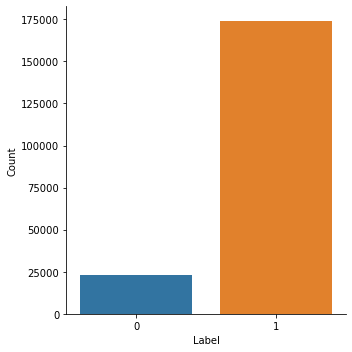

In [25]:
# Data Visualization

graph=sns.catplot(x="label",data=data,kind="count",alpha=1)
graph.set(xlabel="Label",ylabel="Count")
plt.show()

In [26]:
# Feature Selection (Logistic Regression)

Xsel=data.iloc[:,2:34]
Ysel=data.iloc[:,0]

In [27]:
bestfeatures=SelectKBest(score_func=chi2,k=20)

In [28]:
fit=bestfeatures.fit(Xsel,Ysel)

In [29]:
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(Xsel.columns)

In [30]:
featureScores=pd.concat([datacolumns,datascores],axis=1)
featureScores.columns=['Specs','Score']
featureScores

,Specs,Score
0,aon,1.326462e+06
1,daily_decr30,8.548586e+07
2,daily_decr90,1.037457e+08
3,rental30,4.299488e+06
4,rental90,1.015372e+07
5,last_rech_date_ma,2.150183e+06
6,last_rech_date_da,1.301914e+05
7,last_rech_amt_ma,7.631857e+06
8,cnt_ma_rech30,4.763141e+04
9,fr_ma_rech30,2.252767e+04


In [31]:
print(featureScores.nlargest(20,"Score"))

                   Specs         Score
15     sumamnt_ma_rech90  1.798645e+08
2           daily_decr90  1.037457e+08
10     sumamnt_ma_rech30  9.934864e+07
1           daily_decr30  8.548586e+07
4               rental90  1.015372e+07
11  medianamnt_ma_rech30  7.675815e+06
7       last_rech_amt_ma  7.631857e+06
16  medianamnt_ma_rech90  5.281671e+06
3               rental30  4.299488e+06
5      last_rech_date_ma  2.150183e+06
12  medianmarechprebal30  2.033104e+06
0                    aon  1.326462e+06
17  medianmarechprebal90  3.380541e+05
27          amnt_loans90  2.259046e+05
18         cnt_da_rech30  2.258762e+05
6      last_rech_date_da  1.301914e+05
23          amnt_loans30  1.240272e+05
13         cnt_ma_rech90  8.612652e+04
19          fr_da_rech30  7.493082e+04
8          cnt_ma_rech30  4.763141e+04


In [32]:
colnames=["label","sumamnt_ma_rech90","daily_decr90","sumamnt_ma_rech30","daily_decr30","rental90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","rental30","medianmarechprebal30","aon","medianmarechprebal90","amnt_loans90","cnt_da_rech30","amnt_loans30","cnt_ma_rech90","cnt_ma_rech30","last_rech_date_ma","fr_ma_rech30","fr_ma_rech90"]
len(colnames)

21

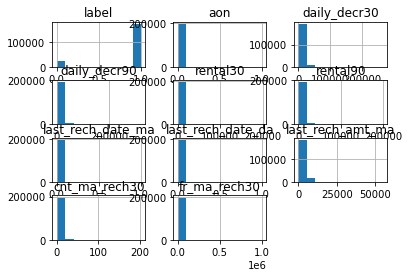

In [33]:
# Visualizing the distribution of each variable

hist = data.iloc[:,0:12].hist()

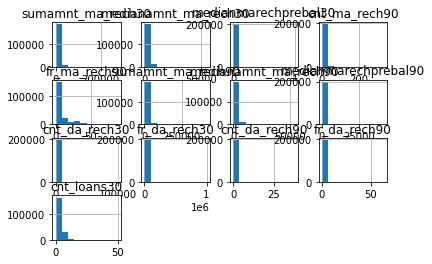

In [34]:
hist = data.iloc[:,12:25].hist()

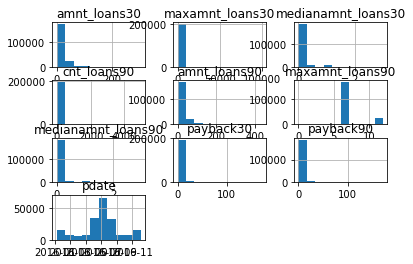

In [35]:
hist = data.iloc[:,25:35].hist()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197333 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 197333 non-null  int64         
 1   msisdn                197333 non-null  object        
 2   aon                   197333 non-null  float64       
 3   daily_decr30          197333 non-null  float64       
 4   daily_decr90          197333 non-null  float64       
 5   rental30              197333 non-null  float64       
 6   rental90              197333 non-null  float64       
 7   last_rech_date_ma     197333 non-null  float64       
 8   last_rech_date_da     197333 non-null  float64       
 9   last_rech_amt_ma      197333 non-null  int64         
 10  cnt_ma_rech30         197333 non-null  int64         
 11  fr_ma_rech30          197333 non-null  float64       
 12  sumamnt_ma_rech30     197333 non-null  float64       
 13 

In [37]:
#includes Target variable "Label"
df=data[colnames]   
#does not include Target variable "Label"
df1=df.iloc[:,1:]   

df1.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,3078,3065.150000,3078.0,3055.050000,260.13,1539.0,1539,1539.0,220.13,7.50,272.0,7.50,12,0.0,12,2,2,2.0,21.0,21
1,5787,12124.750000,5787.0,12122.000000,3691.26,5787.0,5787,5787.0,3691.26,61.04,712.0,61.04,12,0.0,12,1,1,20.0,0.0,0
2,1539,1398.000000,1539.0,1398.000000,900.13,1539.0,1539,1539.0,900.13,66.32,535.0,66.32,6,0.0,6,1,1,3.0,0.0,0
3,947,21.228000,0.0,21.228000,159.42,0.0,947,947.0,159.42,0.00,241.0,2.50,12,0.0,12,1,0,41.0,0.0,0
4,23496,150.619333,20029.0,150.619333,1098.90,2309.0,2309,2888.0,1098.90,29.00,947.0,35.00,42,0.0,42,8,7,4.0,2.0,2


In [38]:
# Normalizing data

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values

In [39]:
X=data.drop(columns=['label'])
Y= data['label']

X=X.apply(pd.to_numeric,errors='coerce')
Y=Y.apply(pd.to_numeric,errors='coerce')

X = np.nan_to_num(X) 

In [40]:
# Define the independent and dependent variable
# Build Models

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) 

In [41]:
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (138133, 34)
Number transactions y_train dataset:  (138133,)
Number transactions X_test dataset:  (59200, 34)
Number transactions y_test dataset:  (59200,)


In [42]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

In [43]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000
mean,0.881799,8162.963611,5629.008544,6368.178216,2825.292433,3659.612118,3832.937763,3767.099897,2015.997639,4.080681,3781.177255,7707.380575,1768.862773,3847.545737,6.514506,7.659484,12541.633361,1814.639120,92.568154,265.270512,3740.172382,0.042856,0.046921,2.815956,18.362038,274.452782,0.054041,18.521334,24.337501,6.733623,0.045664,3.478497,4.438088
std,0.322847,75950.972626,9395.237972,11137.380436,4362.599547,5851.924127,54473.489187,53766.096400,2270.835102,4.302792,53958.524275,9711.435451,1966.978924,53998.840594,7.299807,12.422083,16696.167643,1972.260508,353.441591,4209.439169,53808.140373,0.405995,0.949073,2.589637,17.644145,4244.323635,0.218397,224.126810,26.922492,2.143026,0.200117,8.850613,10.379959
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,249.000000,47.058000,47.300000,331.960000,380.790000,1.000000,0.000000,770.000000,1.000000,0.000000,1546.000000,770.000000,12.300000,2.000000,0.000000,2483.000000,773.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,528.000000,1740.000000,1784.740000,1187.120000,1474.070000,3.000000,0.000000,1539.000000,3.000000,2.000000,4638.000000,1539.000000,35.500000,4.000000,2.000000,7515.000000,1539.000000,37.200000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.857143
75%,1.000000,979.000000,7650.000000,8283.520000,3552.610000,4419.760000,7.000000,0.000000,2309.000000,6.000000,6.000000,10018.000000,1924.000000,84.000000,9.000000,8.000000,16177.000000,1924.000000,80.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.666667
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,999606.368100,275010.000000,55000.000000,999479.419300,336.000000,88.000000,418133.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [44]:
#data = data[np.isfinite(df).all(1)]
data=data.fillna(0)
data=data.replace(np.nan, 0)
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-10-08
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-12-06
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [45]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000,197333.000000
mean,0.881799,8162.963611,5629.008544,6368.178216,2825.292433,3659.612118,3832.937763,3767.099897,2015.997639,4.080681,3781.177255,7707.380575,1768.862773,3847.545737,6.514506,7.659484,12541.633361,1814.639120,92.568154,265.270512,3740.172382,0.042856,0.046921,2.815956,18.362038,274.452782,0.054041,18.521334,24.337501,6.733623,0.045664,3.478497,4.438088
std,0.322847,75950.972626,9395.237972,11137.380436,4362.599547,5851.924127,54473.489187,53766.096400,2270.835102,4.302792,53958.524275,9711.435451,1966.978924,53998.840594,7.299807,12.422083,16696.167643,1972.260508,353.441591,4209.439169,53808.140373,0.405995,0.949073,2.589637,17.644145,4244.323635,0.218397,224.126810,26.922492,2.143026,0.200117,8.850613,10.379959
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,249.000000,47.058000,47.300000,331.960000,380.790000,1.000000,0.000000,770.000000,1.000000,0.000000,1546.000000,770.000000,12.300000,2.000000,0.000000,2483.000000,773.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,528.000000,1740.000000,1784.740000,1187.120000,1474.070000,3.000000,0.000000,1539.000000,3.000000,2.000000,4638.000000,1539.000000,35.500000,4.000000,2.000000,7515.000000,1539.000000,37.200000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.857143
75%,1.000000,979.000000,7650.000000,8283.520000,3552.610000,4419.760000,7.000000,0.000000,2309.000000,6.000000,6.000000,10018.000000,1924.000000,84.000000,9.000000,8.000000,16177.000000,1924.000000,80.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.666667
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,999606.368100,275010.000000,55000.000000,999479.419300,336.000000,88.000000,418133.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [46]:
# logistic regression object 
lr = LogisticRegression(solver='lbfgs', max_iter=400) 
  
# train the model on train set 

X = np.nan_to_num(X) 
lr.fit(X_train, y_train) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.12      1.00      0.21      7037
           1       0.00      0.00      0.00     52163

    accuracy                           0.12     59200
   macro avg       0.06      0.50      0.11     59200
weighted avg       0.01      0.12      0.03     59200



In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 

from imblearn.over_sampling import SMOTE 


sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 121845
Before OverSampling, counts of label '0': 16288 

After OverSampling, the shape of train_X: (243690, 34)
After OverSampling, the shape of train_y: (243690,) 

After OverSampling, counts of label '1': 121845
After OverSampling, counts of label '0': 121845


In [48]:
lr1 = LogisticRegression(solver='lbfgs', max_iter=400) 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

In [49]:

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[    0  7037]
 [    0 52163]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7037
           1       0.88      1.00      0.94     52163

    accuracy                           0.88     59200
   macro avg       0.44      0.50      0.47     59200
weighted avg       0.78      0.88      0.83     59200



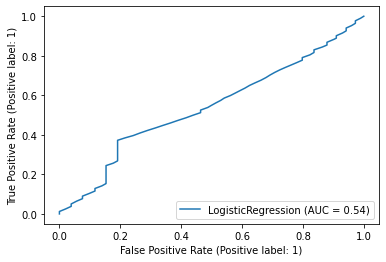

In [50]:
metrics.plot_roc_curve(lr1, X_test, y_test) 
plt.show()

In [52]:
# 2. Linear SVM

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_res, y_train_res)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
metrics.plot_roc_curve(svclassifier, X_test, y_test) 
plt.show()

In [51]:
# 3. Decision Tree

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)
y_pred1 = clf.predict(X_test)

In [52]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[ 3890  3147]
 [ 4247 47916]]
              precision    recall  f1-score   support

           0       0.48      0.55      0.51      7037
           1       0.94      0.92      0.93     52163

    accuracy                           0.88     59200
   macro avg       0.71      0.74      0.72     59200
weighted avg       0.88      0.88      0.88     59200



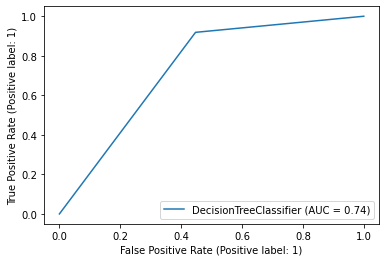

In [53]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show() 

In [54]:
# 4. Random Forest

rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_res,y_train_res)
y_pred2=rfc.predict(X_test)

In [55]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 3419  3618]
 [ 1285 50878]]
              precision    recall  f1-score   support

           0       0.73      0.49      0.58      7037
           1       0.93      0.98      0.95     52163

    accuracy                           0.92     59200
   macro avg       0.83      0.73      0.77     59200
weighted avg       0.91      0.92      0.91     59200



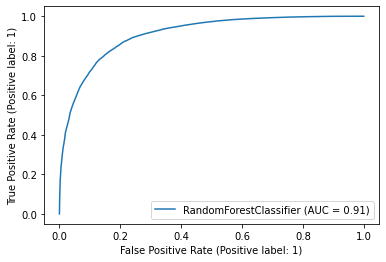

In [56]:
metrics.plot_roc_curve(rfc, X_test, y_test) 
plt.show()  

In [59]:
# 5. Gradient Boost Classifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_res,y_train_res)
y_pred3=gbc.predict(X_test)

In [60]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[ 4115  2922]
 [ 3356 48807]]
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      7037
           1       0.94      0.94      0.94     52163

    accuracy                           0.89     59200
   macro avg       0.75      0.76      0.75     59200
weighted avg       0.90      0.89      0.90     59200



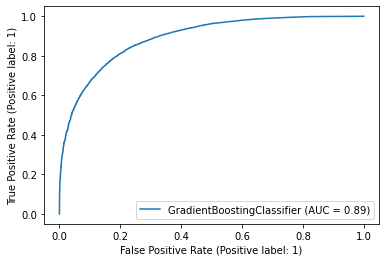

In [61]:
metrics.plot_roc_curve(gbc, X_test, y_test) 
plt.show()  